<a href="https://colab.research.google.com/github/vinayak-reddy45/Bharat_Intern_Number_Recognition/blob/main/Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('Training Images:{}'.format(x_train.shape))
print('Testing Images:{}'.format(x_test.shape))

Training Images:(60000, 28, 28)
Testing Images:(10000, 28, 28)


In [11]:
print(x_train[1].shape)

(28, 28)


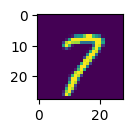

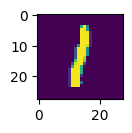

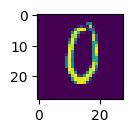

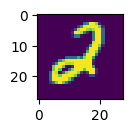

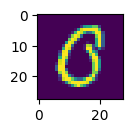

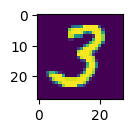

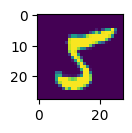

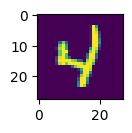

In [20]:
for i in range(230,238):
  plt.subplot(120+1+i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 21s 42ms/step - loss: 0.2145 - accuracy: 0.9385 - val_loss: 0.0843 - val_accuracy: 0.9723
Epoch 2/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 3/5
469/469 [==============================] - 20s 42ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.0490 - val_accuracy: 0.9831
Epoch 4/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0446 - val_accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 19s 42ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0448 - val_accuracy: 0.9847


In [15]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 4ms/step


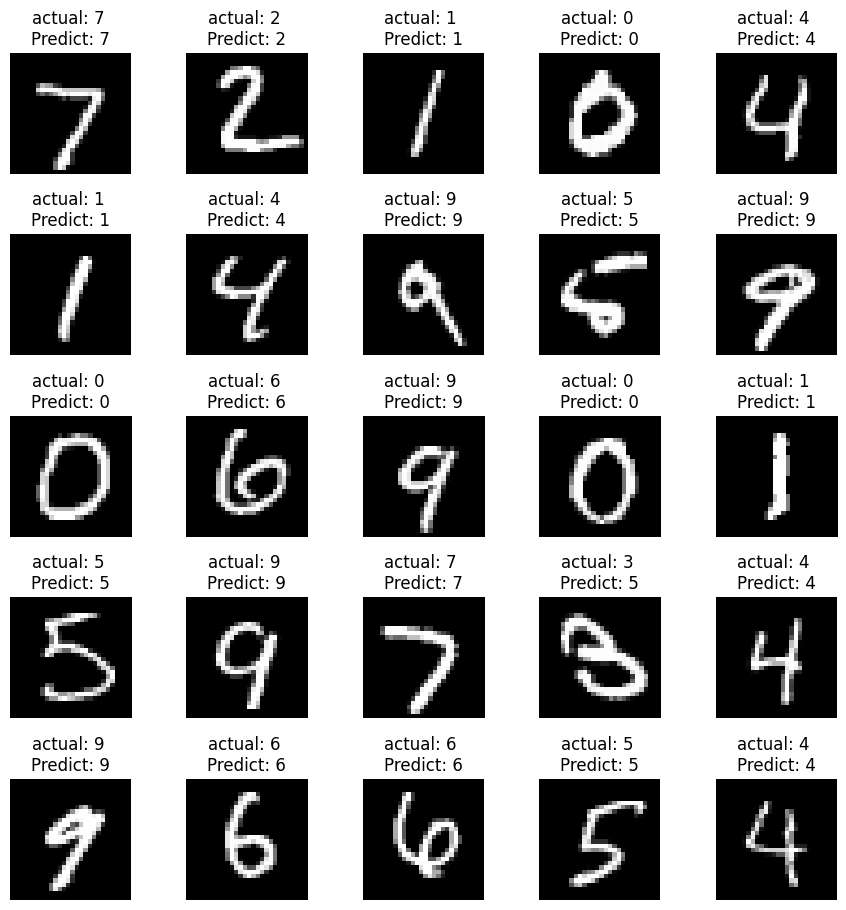

In [19]:
fig, axes = plt.subplots(5, 5, figsize=(11, 11))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title('actual: %s \nPredict: %s' % (np.argmax(y_test[i]), predicted_labels[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()